In [1]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loa()ding json file from kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vermadeeksha","key":"2a9633ff65b80e13561d6e2ab4be111e"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d 'ejlok1/toronto-emotional-speech-set-tess'

 96% 412M/428M [00:02<00:00, 150MB/s]
100% 428M/428M [00:03<00:00, 148MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/toronto-emotional-speech-set-tess.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import os
# Define lists to store file paths and labels
# Define lists to store file paths and labels
paths = []
labels = []

# Iterate through the extracted files
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break

In [9]:
print(f"length of paths: {len(paths)} and length of labels: {len(labels)}")

length of paths: 2800 and length of labels: 2800


In [10]:
df = pd.DataFrame()

In [11]:
df['speech'] = paths
df['Label'] = labels

In [12]:
df.head()

,speech,Label
0,/content/TESS Toronto emotional speech set dat...,angry
1,/content/TESS Toronto emotional speech set dat...,angry
2,/content/TESS Toronto emotional speech set dat...,angry
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,angry


In [13]:
df.Label.value_counts()

angry      400
disgust    400
happy      400
neutral    400
sad        400
ps         400
fear       400
Name: Label, dtype: int64

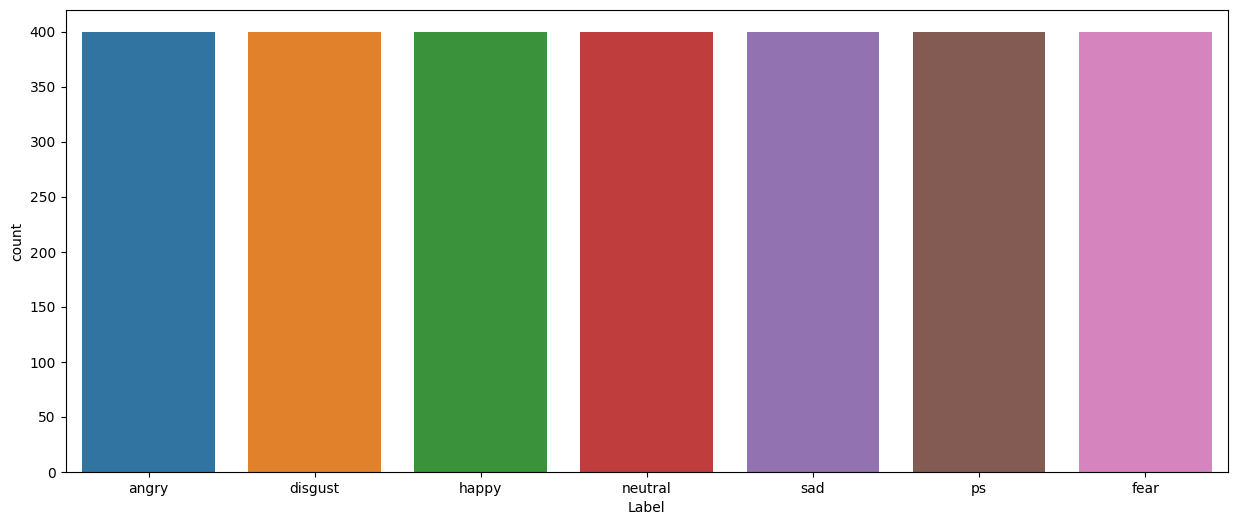

In [14]:
plt.figure(figsize = (15,6))
sns.countplot(x = df['Label'])
plt.show()

In [15]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

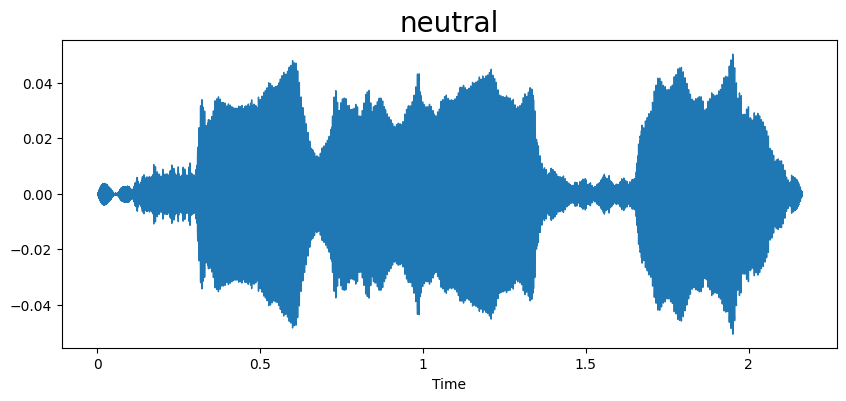

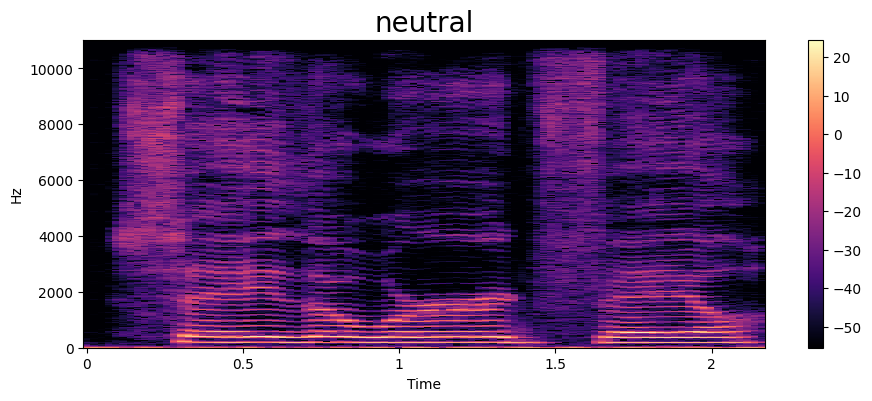

In [16]:
emotion = 'neutral'
path = np.array(df['speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

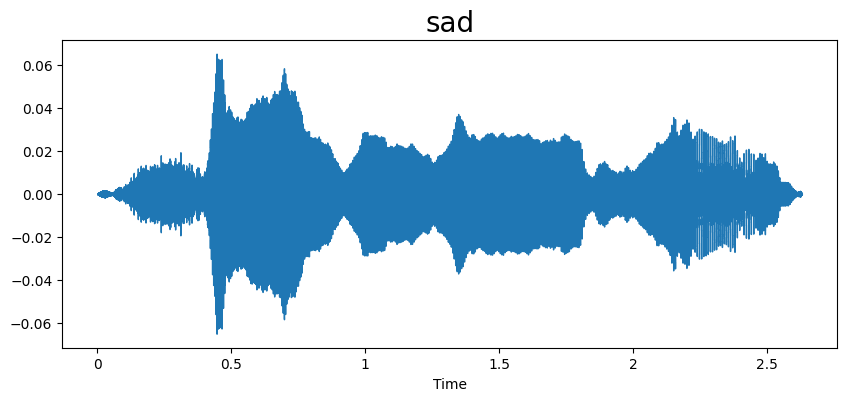

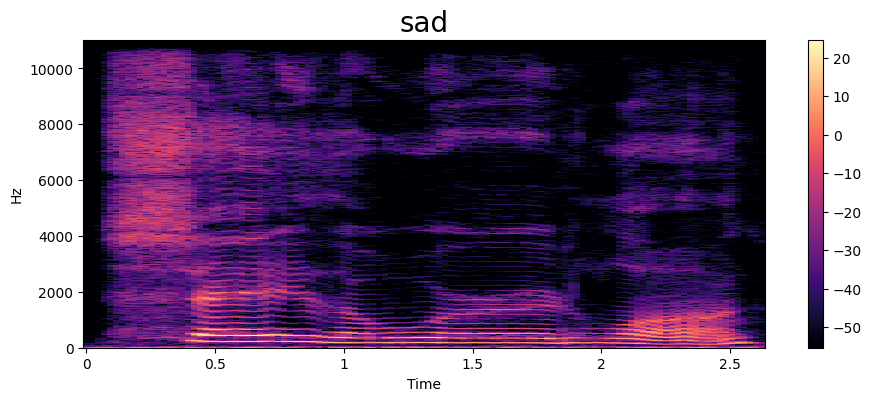

In [17]:
emotion = 'sad'
path = np.array(df['speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

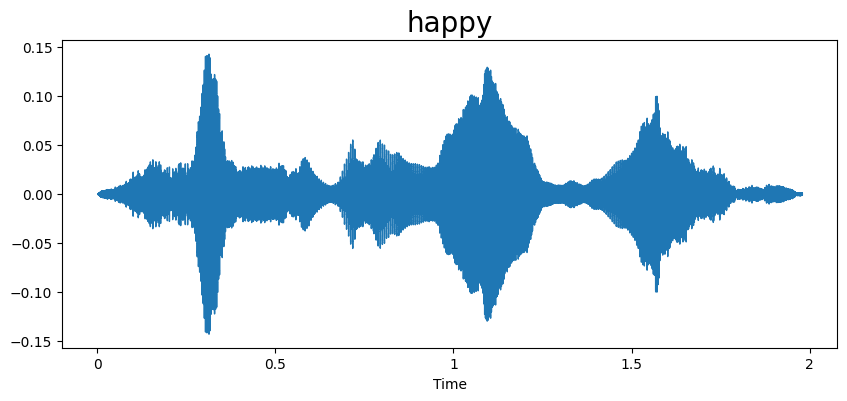

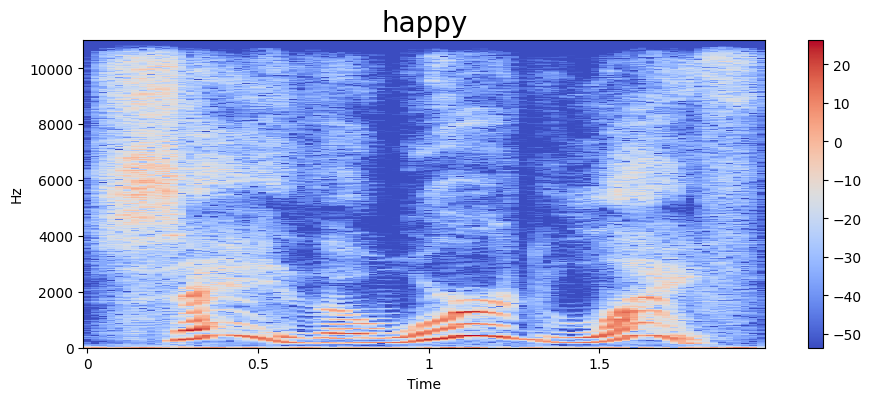

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

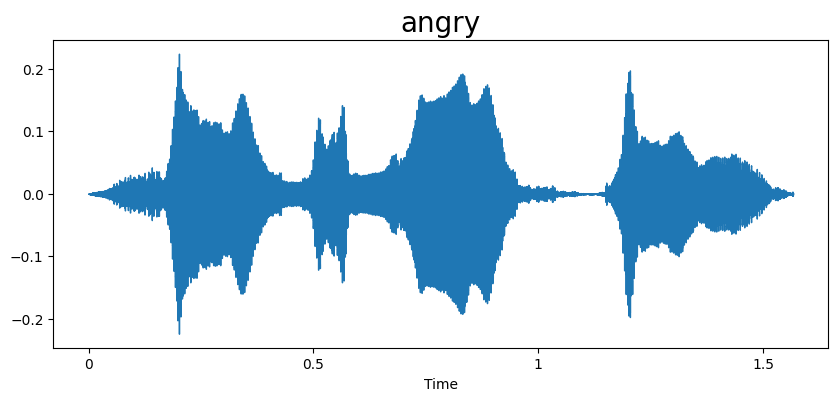

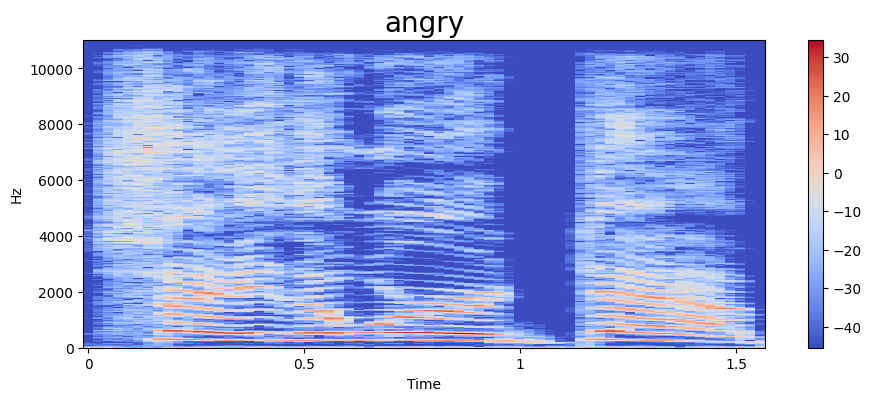

In [19]:
emotion = 'angry'
path = np.array(df['speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

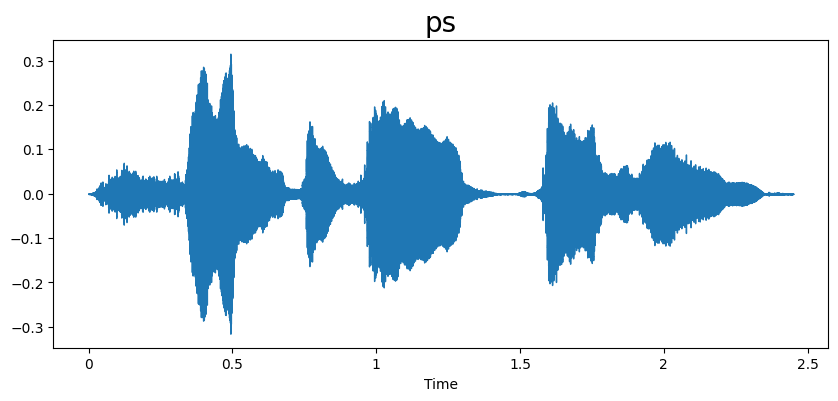

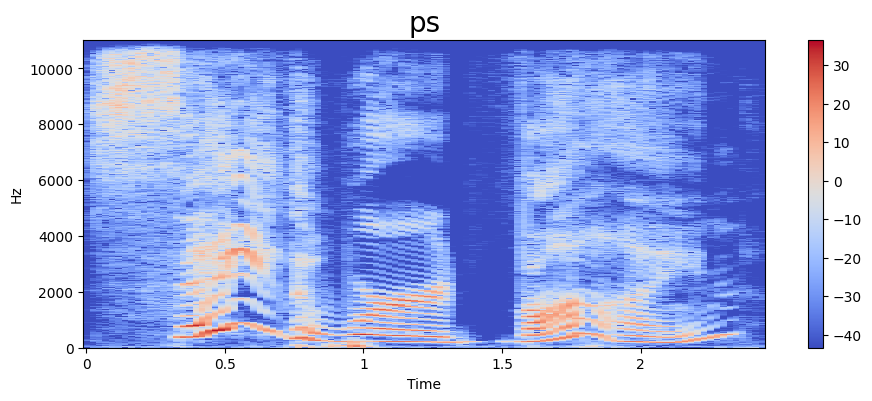

In [20]:
emotion = 'ps'
path = np.array(df['speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

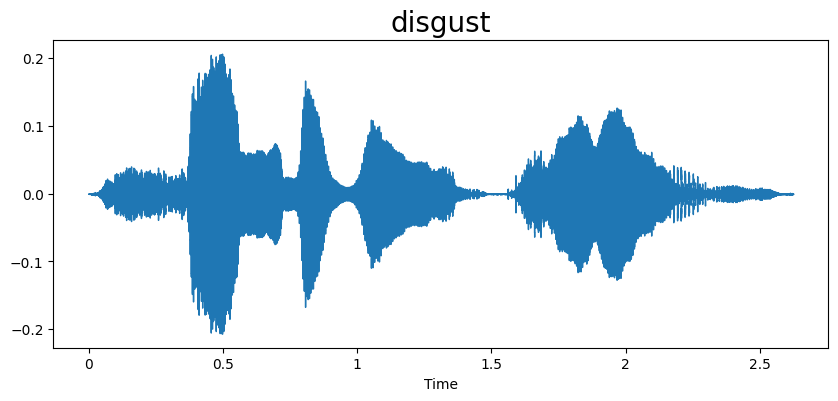

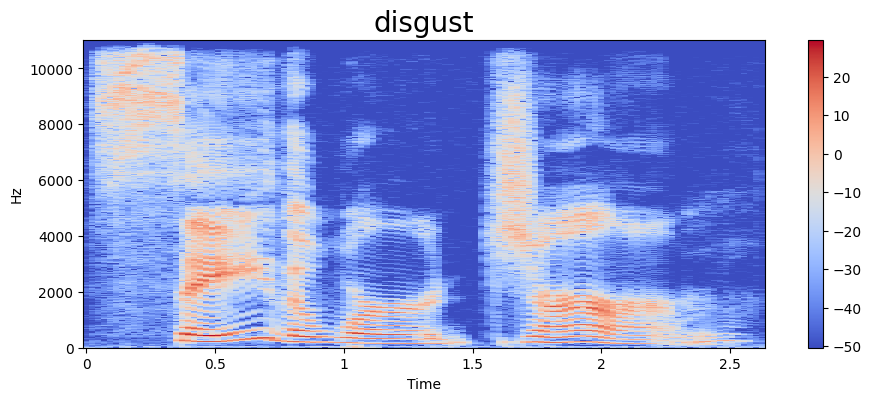

In [21]:
emotion = 'disgust'
path = np.array(df['speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

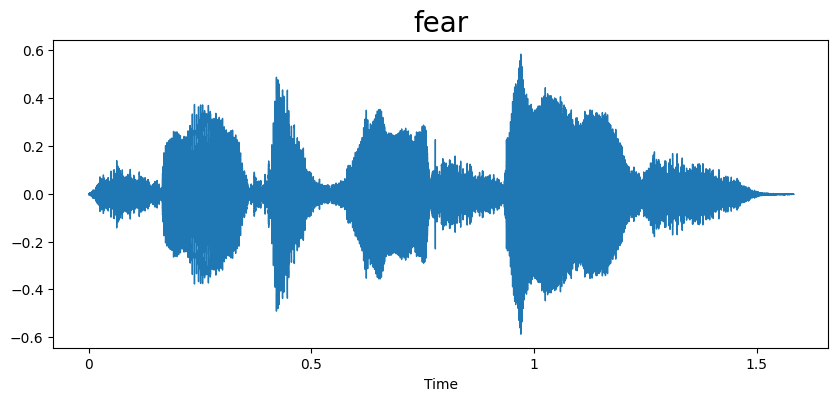

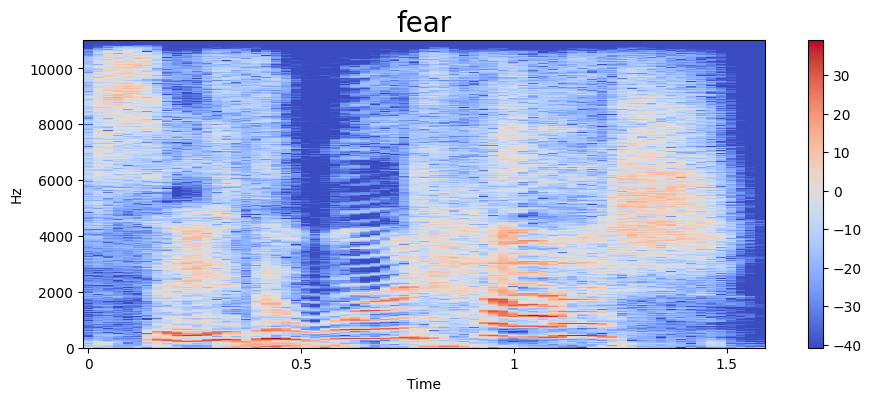

In [22]:
emotion = 'fear'
path = np.array(df['speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [23]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [24]:
extract_mfcc(df['speech'][0])

array([-393.85056  ,   69.498505 ,  -12.267358 ,  -24.066738 ,
         -4.1931105,    6.809017 ,  -21.691282 ,   -6.749023 ,
        -10.583242 ,   -8.296793 ,   -6.834389 ,    4.4798155,
         -4.059573 ,    7.5453277,   -5.245487 ,    2.639705 ,
         -3.4955463,   -7.087704 ,   -3.8418696,  -14.674645 ,
         -1.3879989,   -2.5809302,   -6.086822 ,   10.962363 ,
         17.287996 ,   29.016508 ,   28.872456 ,   25.132318 ,
         14.472491 ,   10.516374 ,    2.291373 ,   11.500051 ,
          8.179181 ,    2.8370087,    3.878112 ,    2.492613 ,
         -0.6328469,    7.2852154,   -1.8283268,    3.6603055],
      dtype=float32)

In [25]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [26]:
X_mfcc

0       [-393.85056, 69.498505, -12.267358, -24.066738...
1       [-402.59885, 61.828686, -8.522907, -3.3536022,...
2       [-392.97095, 52.796944, -1.6024941, -19.41383,...
3       [-418.86243, 78.523705, -14.710656, -25.449999...
4       [-388.5316, 74.129326, -26.982569, -16.609266,...
                              ...                        
2795    [-439.6242, 62.804733, 4.647074, -0.05418032, ...
2796    [-483.49344, 111.59739, 23.837387, -36.052895,...
2797    [-439.8527, 82.289604, 8.262271, -25.719894, -...
2798    [-424.749, 87.84273, 17.460545, -20.573887, -6...
2799    [-424.50217, 39.664684, 11.769028, 5.188812, -...
Name: speech, Length: 2800, dtype: object

In [27]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoding = OneHotEncoder()
y = encoding.fit_transform(df[['Label']])

In [29]:
y = y.toarray()

In [30]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [31]:
y.shape

(2800, 7)

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)


**Create a LSTM model**

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [35]:
# Train the model
history = model.fit(x_train,y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 [==============================] - 10s 252ms/step - loss: 1.3255 - accuracy: 0.4693 - val_loss: 0.8228 - val_accuracy: 0.6629
Epoch 2/50
28/28 [==============================] - 6s 201ms/step - loss: 0.5948 - accuracy: 0.7740 - val_loss: 0.3572 - val_accuracy: 0.8839
Epoch 3/50
28/28 [==============================] - 5s 183ms/step - loss: 0.3988 - accuracy: 0.8666 - val_loss: 0.2699 - val_accuracy: 0.9107
Epoch 4/50
28/28 [==============================] - 6s 227ms/step - loss: 0.3617 - accuracy: 0.8783 - val_loss: 0.2881 - val_accuracy: 0.8906
Epoch 5/50
28/28 [==============================] - 5s 189ms/step - loss: 0.2360 - accuracy: 0.9247 - val_loss: 0.1271 - val_accuracy: 0.9598
Epoch 6/50
28/28 [==============================] - 6s 235ms/step - loss: 0.1710 - accuracy: 0.9470 - val_loss: 0.1161 - val_accuracy: 0.9665
Epoch 7/50
28/28 [==============================] - 5s 184ms/step - loss: 0.1308 - accuracy: 0.9604 - val_loss: 0.1249 - val_accuracy: 0.9598
Epoch

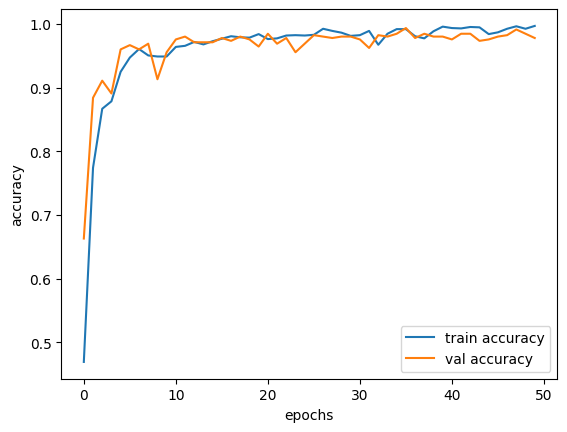

In [37]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

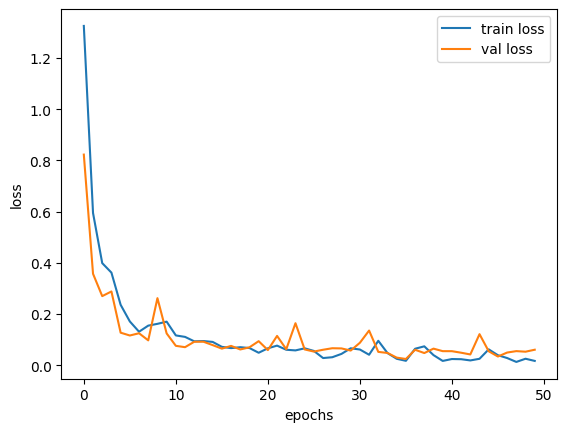

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
model.evaluate(x_train , y_train)


70/70 [==============================] - 3s 39ms/step - loss: 0.0420 - accuracy: 0.9875


[0.04202888533473015, 0.987500011920929]

In [40]:
y_pred = model.predict(x_test, batch_size=5)


112/112 [==============================] - 3s 15ms/step


In [41]:
accuracy_score=model.evaluate(x_test , y_test)
print ("Model evaluation accuracy: ", round(accuracy_score[1]*100),"%")

18/18 [==============================] - 1s 63ms/step - loss: 0.1152 - accuracy: 0.9786
Model evaluation accuracy:  98 %
